**Funções de Ativação: Dando Vida às Redes Neurais**

Funções de Ativação Comuns e Suas Diferenças:
1. Sigmoid (Ativação Sigmoide ou Logística)
* O que faz: "Comprime" qualquer valor de entrada x para um valor entre 0 e 1.
* Quando usar:
 * Historicamente usada em camadas ocultas, mas hoje menos comum devido a  problemas (veja desvantagens).
 * Muito comum na camada de saída de problemas de classificação binária, onde você quer uma probabilidade de pertencer à classe positiva (entre 0 e 1).
2. ReLU (Rectified Linear Unit)
* O que faz: Retorna o próprio valor de entrada se for positivo, e 0 se for negativo.
* Quando usar: Atualmente, a função de ativação mais popular para camadas ocultas em redes neurais profundas.
3. Softmax
* O que faz: Converte um vetor de números reais (as saídas de uma camada anterior) em uma distribuição de probabilidade. A soma de todas as saídas será 1.
* Quando usar: Exclusivamente na camada de saída de problemas de classificação multiclasse, onde você quer a probabilidade de pertencer a cada uma das K classes.
4. Leaky ReLU:
* Diferença para ReLU: Resolve o problema do "Neurônio Morto" permitindo um pequeno gradiente (não zero) para entradas negativas.
* Quando usar: Uma alternativa à ReLU quando o Dying ReLU é um problema.
5. ELU (Exponential Linear Unit):
* Diferença para ReLU/Leaky ReLU: Além de não ter o problema do Dying ReLU, suas saídas são mais próximas de zero, o que pode acelerar o aprendizado.
6. Tanh (Tangente Hiperbólica):
* Diferença para Sigmoid: Comprime valores entre -1 e 1 (saída centrada em zero), o que é geralmente preferível ao Sigmoid para camadas ocultas. Ainda sofre de gradiente desvanecente para valores extremos.
* Quando usar: Historicamente usada em camadas ocultas, melhor que Sigmoid, mas superada por ReLU.


Iniciando a demonstração didática das Funções de Ativação...

PASSO 1: Definindo as funções matemáticas para Sigmoid, ReLU, Softmax, Leaky ReLU e Tanh.
  - Sigmoid: Comprime a saída entre 0 e 1.
  - ReLU: Retorna x se positivo, 0 se negativo.
  - Leaky ReLU: Como ReLU, mas com um pequeno declive para entradas negativas.
  - Tanh: Comprime a saída entre -1 e 1.
  - Softmax: Converte um vetor em distribuição de probabilidades (soma 1).

---------------------------------------------------

PASSO 2: Gerando uma faixa de valores de entrada (x) para testar as funções.
  Exemplo de entrada para Softmax: [1. 2. 3.]

---------------------------------------------------

PASSO 3: Aplicando e visualizando as funções de ativação.


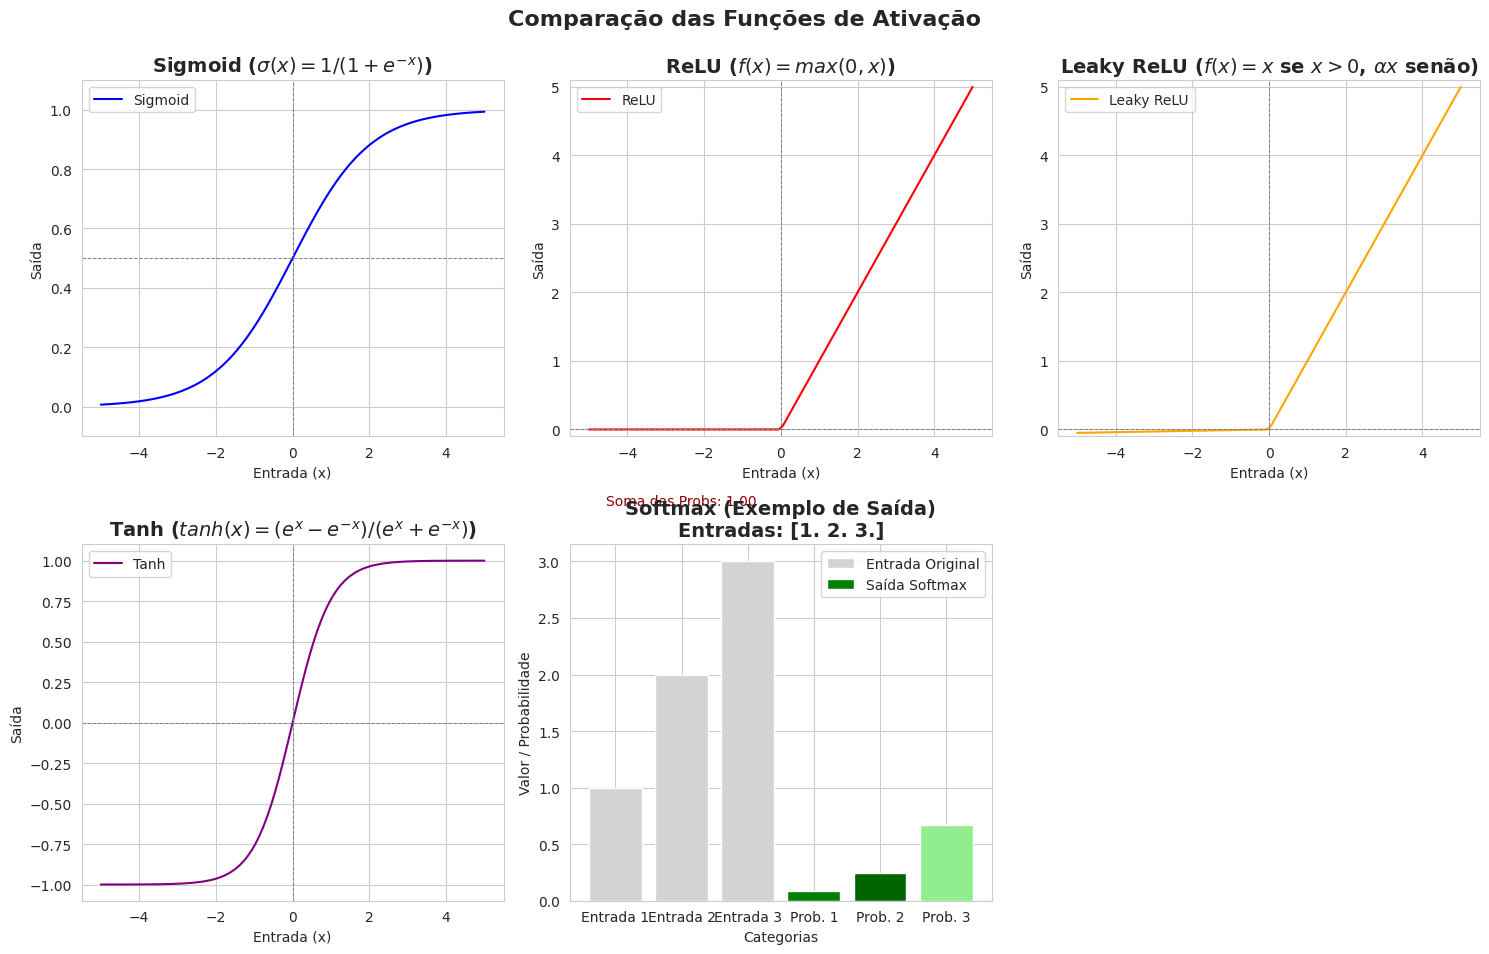


--- RESUMO FINAL ---
Observe nos gráficos e nas descrições:

**Sigmoid:**
- Comprime valores entre 0 e 1. Útil para camadas de saída em classificação binária (probabilidade).
- Sofre com o problema do gradiente desvanecente para entradas muito grandes ou muito pequenas.

**ReLU:**
- A mais popular para camadas ocultas. Simples e eficiente.
- Resolve o gradiente desvanecente para entradas positivas, mas pode ter 'neurônios mortos' (saída e gradiente 0 para negativos).

**Leaky ReLU:**
- Uma melhoria da ReLU, permitindo um pequeno gradiente para entradas negativas, mitigando o problema dos neurônios mortos.

**Tanh:**
- Similar à Sigmoid, mas com saída centrada em 0 (entre -1 e 1). Melhor para camadas ocultas que a Sigmoid, mas ainda sofre de gradiente desvanecente.

**Softmax:**
- Transforma um vetor de números em uma distribuição de probabilidades, onde a soma é 1.
- **EXCLUSIVAMENTE para a camada de saída** em problemas de classificação multiclasse (mais de duas classes).

A escolha 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Iniciando a demonstração didática das Funções de Ativação...\n")

# --- 1. Definindo as Funções de Ativação ---
print("PASSO 1: Definindo as funções matemáticas para Sigmoid, ReLU, Softmax, Leaky ReLU e Tanh.")

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def tanh(x):
    return np.tanh(x)

def softmax(x):
    """
    Implementação de softmax.
    É importante lidar com valores grandes para evitar overflow (np.exp(grande)).
    Uma técnica é subtrair o máximo do vetor antes do exp.
    """
    e_x = np.exp(x - np.max(x)) # Subtrai o máximo para estabilidade numérica
    return e_x / e_x.sum(axis=0) # Sum no eixo 0 para vetor 1D

print("  - Sigmoid: Comprime a saída entre 0 e 1.")
print("  - ReLU: Retorna x se positivo, 0 se negativo.")
print("  - Leaky ReLU: Como ReLU, mas com um pequeno declive para entradas negativas.")
print("  - Tanh: Comprime a saída entre -1 e 1.")
print("  - Softmax: Converte um vetor em distribuição de probabilidades (soma 1).\n")
print("---------------------------------------------------\n")

# --- 2. Geração de Dados para Visualização ---
print("PASSO 2: Gerando uma faixa de valores de entrada (x) para testar as funções.")
x_values = np.linspace(-5, 5, 100) # De -5 a 5 com 100 pontos
x_softmax_example = np.array([1.0, 2.0, 3.0]) # Exemplo para Softmax

print(f"  Exemplo de entrada para Softmax: {x_softmax_example}\n")
print("---------------------------------------------------\n")

# --- 3. Aplicação e Visualização das Funções de Ativação ---
print("PASSO 3: Aplicando e visualizando as funções de ativação.")

plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Sigmoid
plt.subplot(2, 3, 1) # 2 linhas, 3 colunas, 1º gráfico
plt.plot(x_values, sigmoid(x_values), label='Sigmoid', color='blue')
plt.title('Sigmoid ($\sigma(x) = 1 / (1 + e^{-x})$)', fontsize=14, weight='bold')
plt.xlabel('Entrada (x)')
plt.ylabel('Saída')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.ylim(-0.1, 1.1)
plt.legend()

# ReLU
plt.subplot(2, 3, 2)
plt.plot(x_values, relu(x_values), label='ReLU', color='red')
plt.title('ReLU ($f(x) = max(0, x)$)', fontsize=14, weight='bold')
plt.xlabel('Entrada (x)')
plt.ylabel('Saída')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.ylim(-0.1, 5.1)
plt.legend()

# Leaky ReLU
plt.subplot(2, 3, 3)
plt.plot(x_values, leaky_relu(x_values), label='Leaky ReLU', color='orange')
plt.title('Leaky ReLU ($f(x) = x$ se $x>0$, $\\alpha x$ senão)', fontsize=14, weight='bold')
plt.xlabel('Entrada (x)')
plt.ylabel('Saída')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.ylim(-0.1, 5.1)
plt.legend()

# Tanh
plt.subplot(2, 3, 4)
plt.plot(x_values, tanh(x_values), label='Tanh', color='purple')
plt.title('Tanh ($tanh(x) = (e^x - e^{-x}) / (e^x + e^{-x})$)', fontsize=14, weight='bold')
plt.xlabel('Entrada (x)')
plt.ylabel('Saída')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.ylim(-1.1, 1.1)
plt.legend()

# Softmax (com exemplo de vetor)
plt.subplot(2, 3, 5)
softmax_output = softmax(x_softmax_example)
plt.bar(['Entrada 1', 'Entrada 2', 'Entrada 3'], x_softmax_example, color='lightgray', label='Entrada Original')
plt.bar(['Prob. 1', 'Prob. 2', 'Prob. 3'], softmax_output, color=['green', 'darkgreen', 'lightgreen'], label='Saída Softmax')
plt.title(f'Softmax (Exemplo de Saída)\nEntradas: {x_softmax_example}', fontsize=14, weight='bold')
plt.xlabel('Categorias')
plt.ylabel('Valor / Probabilidade')
plt.text(1, np.max(x_softmax_example) + 0.5, f'Soma das Probs: {np.sum(softmax_output):.2f}', horizontalalignment='center', fontsize=10, color='darkred')
plt.legend()

# Ajuste do layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta para o título principal não sobrepor
plt.suptitle('Comparação das Funções de Ativação', fontsize=16, weight='bold')
plt.show()

print("\n--- RESUMO FINAL ---")
print("Observe nos gráficos e nas descrições:")
print("\n**Sigmoid:**")
print("- Comprime valores entre 0 e 1. Útil para camadas de saída em classificação binária (probabilidade).")
print("- Sofre com o problema do gradiente desvanecente para entradas muito grandes ou muito pequenas.")

print("\n**ReLU:**")
print("- A mais popular para camadas ocultas. Simples e eficiente.")
print("- Resolve o gradiente desvanecente para entradas positivas, mas pode ter 'neurônios mortos' (saída e gradiente 0 para negativos).")

print("\n**Leaky ReLU:**")
print("- Uma melhoria da ReLU, permitindo um pequeno gradiente para entradas negativas, mitigando o problema dos neurônios mortos.")

print("\n**Tanh:**")
print("- Similar à Sigmoid, mas com saída centrada em 0 (entre -1 e 1). Melhor para camadas ocultas que a Sigmoid, mas ainda sofre de gradiente desvanecente.")

print("\n**Softmax:**")
print("- Transforma um vetor de números em uma distribuição de probabilidades, onde a soma é 1.")
print("- **EXCLUSIVAMENTE para a camada de saída** em problemas de classificação multiclasse (mais de duas classes).")

print("\nA escolha da função de ativação é fundamental e depende do propósito da camada na rede neural e do tipo de problema (regressão, classificação binária, multiclasse).")